I. Realice una simulación del siguiente problema:
En una clase de modelación y simulación hay 1,000,000 estudiantes distribuidos de la siguiente manera:
- 400,000 son mujeres
- 300,000 personas usan lentes
- 150,000 varones usan lentes
Si se selecciona al azar un estudiante, ¿cuál es la probabilidad que sea mujer y use gafas?
Si se selecciona a alguien que no usa lentes, ¿cuál es la probabilidad que sea varón?
Nota: La generación de variables aleatorias debe realizarse con los procedimientos vistos en clase. Es decir, utilizar el método de transformada inversa o aceptación y rechazo.

In [6]:
import random

# Definir las probabilidades de género y uso de lentes
probabilidad_mujer = 400000 / 1000000
probabilidad_lentes = 300000 / 1000000
probabilidad_varon_lentes = 150000 / 1000000

# Calcular la probabilidad de ser mujer y usar lentes
probabilidad_mujer_lentes = probabilidad_mujer * probabilidad_lentes

# Calcular la probabilidad de ser varón y no usar lentes
probabilidad_varon_no_lentes = (1 - probabilidad_mujer) * (1 - probabilidad_lentes)

# Número de simulaciones
num_simulaciones = 1000000

# Inicializar contadores
contador_mujer_lentes = 0
contador_varon_no_lentes = 0

# Realizar simulaciones
for _ in range(num_simulaciones):
    # Generar una variable aleatoria para el género
    genero = "Mujer" if random.random() < probabilidad_mujer else "Varon"
    
    # Generar una variable aleatoria para el uso de lentes
    usa_lentes = random.random() < probabilidad_lentes
    
    # Calcular la probabilidad de ser mujer y usar lentes
    if genero == "Mujer" and usa_lentes:
        contador_mujer_lentes += 1
    
    # Calcular la probabilidad de ser varón y no usar lentes
    if genero == "Varon" and not usa_lentes:
        contador_varon_no_lentes += 1

# Calcular las probabilidades simuladas
probabilidad_simulada_mujer_lentes = contador_mujer_lentes / num_simulaciones
probabilidad_simulada_varon_no_lentes = contador_varon_no_lentes / num_simulaciones

# Imprimir resultados
print("Probabilidad simulada de ser mujer y usar lentes:", probabilidad_simulada_mujer_lentes)
print("Probabilidad simulada de ser varón y no usar lentes:", probabilidad_simulada_varon_no_lentes)


Probabilidad simulada de ser mujer y usar lentes: 0.119918
Probabilidad simulada de ser varón y no usar lentes: 0.420093


I. Realice la siguiente simulación:


a) Seleccione una distribución de probabilidad discreta de su preferencia, especificando valores numéricos para sus parámetros. Genere n=1,000,000 valores independientes al azar 
 de esta distribución y calcule las medias aritméticas parciales Sn= (1/n)(sumatoria desde i=1 hasta n)(Xi)
, n=1,2,..., 1,000,000.
Grafique la función n-> Sn
 uniendo los valores con una línea recta. Sea 
 la media de la distribución. Trace en la misma gráfica la función constante μ
 y verifique gráficamente que la función n-> Sn
 oscila  y se aproxima al valor μ
 conforme n crece. 


b) Realice lo mismo que el inciso 

a), pero con una distribución continua de su preferencia.
Nota: La generación de variables aleatorias debe realizarse con los procedimientos vistos en clase. Es decir, utilizar el método de transformada inversa o aceptación y rechazo.
En el caso II.

b), favor no utilizar la distribución uniforme.

### Simulación para una distribución discreta (Binomial)
##### n = 10, p = 0.5    np=5

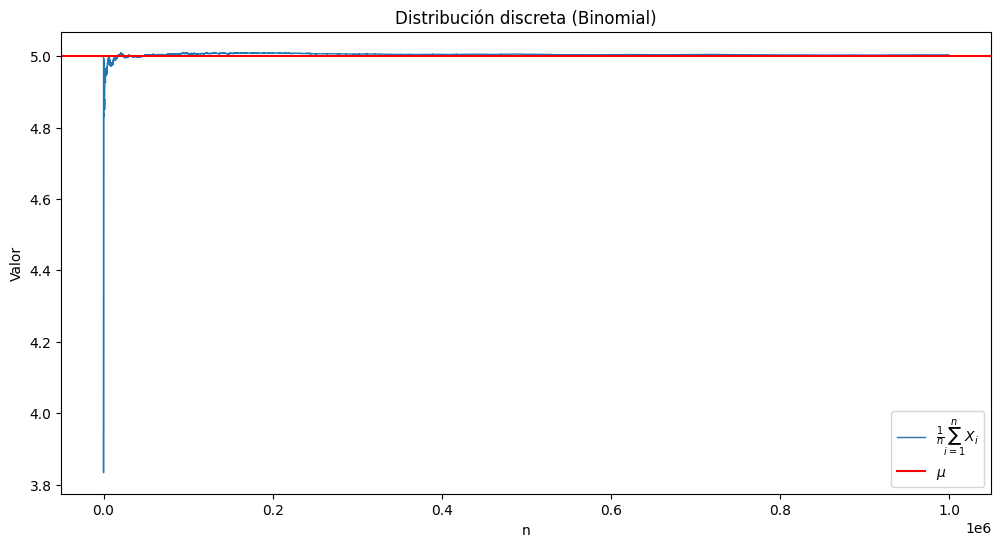

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_binomial(n, p, N):
    values = []
    for _ in range(N):
        X = 0
        for _ in range(n):
            U = np.random.rand()
            if U < p:
                X += 1
        values.append(X)
    return np.array(values)

# Parámetros de la distribución binomial
n_trials = 10
p = 0.5
mu = n_trials * p

# Generar n=1,000,000 valores usando el método de transformada inversa
N = 1000000
binomial_values = generate_binomial(n_trials, p, N)

# Calcular medias aritméticas parciales
S_n = np.cumsum(binomial_values) / np.arange(1, N + 1)

# Gráfica
plt.figure(figsize=(12, 6))
plt.plot(S_n, label=r'$\frac{1}{n}\sum_{i=1}^{n}X_i$', lw=1)
plt.axhline(y=mu, color='r', linestyle='-', label=r'$\mu$')
plt.xlabel('n')
plt.ylabel('Valor')
plt.legend()
plt.title('Distribución discreta (Binomial)')
plt.show()


### Simulación para una distribución continua (Exponencial)
#####  λ = 2
##### μ = 1/λ = 0.5

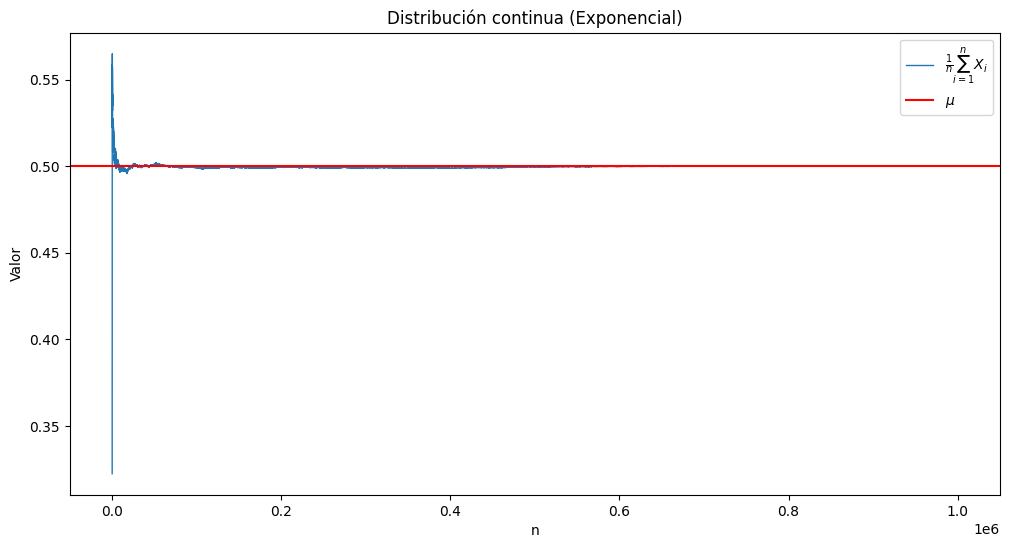

In [8]:
# Parámetros de la distribución exponencial
lambda_exp = 2
mu_exp = 1 / lambda_exp

# Generar n=1,000,000 valores usando el método de transformada inversa
U_exp = np.random.rand(N)
exponential_values = -np.log(1 - U_exp) / lambda_exp

# Calcular medias aritméticas parciales
S_n_exp = np.cumsum(exponential_values) / np.arange(1, N + 1)

# Gráfica
plt.figure(figsize=(12, 6))
plt.plot(S_n_exp, label=r'$\frac{1}{n}\sum_{i=1}^{n}X_i$', lw=1)
plt.axhline(y=mu_exp, color='r', linestyle='-', label=r'$\mu$')
plt.xlabel('n')
plt.ylabel('Valor')
plt.legend()
plt.title('Distribución continua (Exponencial)')
plt.show()


III. Estime el valor de la integral, realizando una simulación:  (de infinito a -infinito)∫xe^(-x^2)dx
.
Nota: La generación de variables aleatorias debe realizarse con los procedimientos vistos en clase. Es decir, utilizar el método de transformada inversa o aceptación y rechazo.

In [9]:
import numpy as np

def f(x):
    return x * np.exp(-x**2)

def g(x):
    return np.exp(-x**2)

# Normalización de g(x)
def c_value():
    return np.sqrt(np.pi)

# Método de Aceptación-Rechazo
def acceptance_rejection(n):
    c = c_value()
    count = 0
    integral_value = 0

    for _ in range(n):
        x = np.random.normal(0, 1)  # Generamos x de una distribución normal estándar
        y = np.random.uniform(0, c * g(x))

        if y <= f(x):
            count += 1
            integral_value += y

    return (integral_value / count) * (count / n) * 2  # Multipliqué por 2 para tener en cuenta ambos lados del eje x

# Parámetros
n = 100000  # Número de iteraciones

# Estimación de la integral
integral_estimate = acceptance_rejection(n)
print(f"Estimación de la integral: {integral_estimate}")

Estimación de la integral: 0.05376759083055991


# Discreta

C:\Users\josem\AppData\Local\Temp\ipykernel_14664\1066192218.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


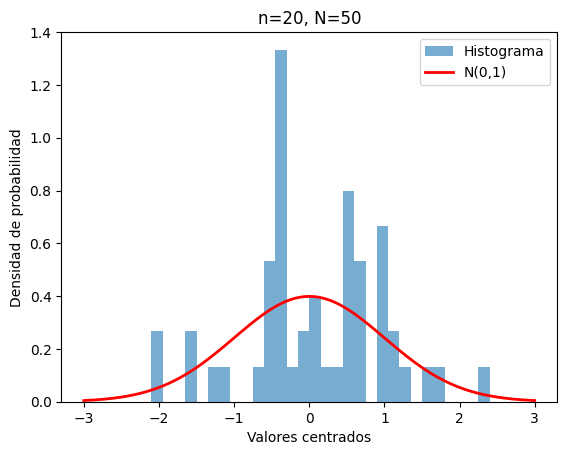

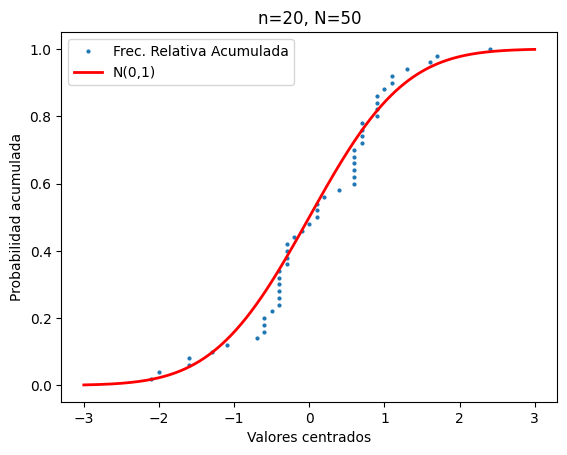

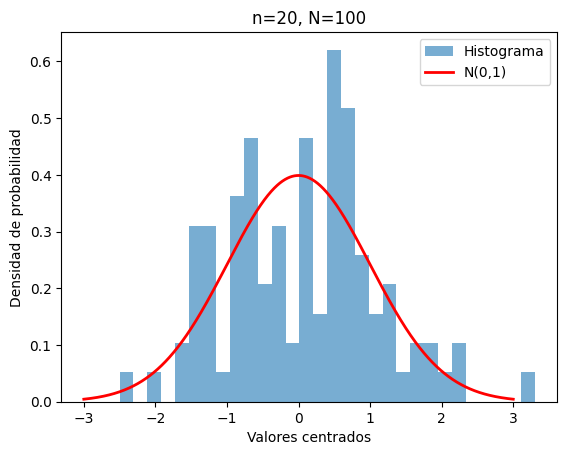

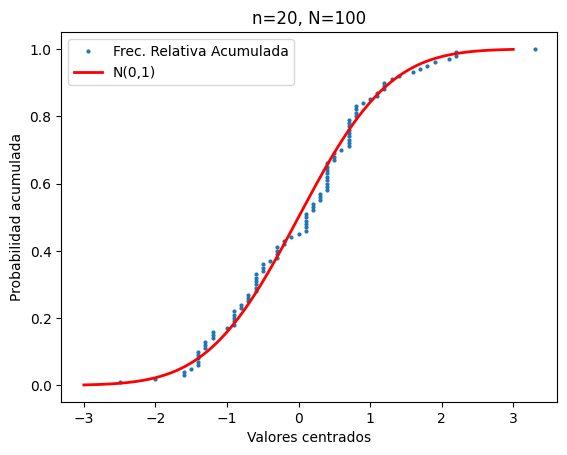

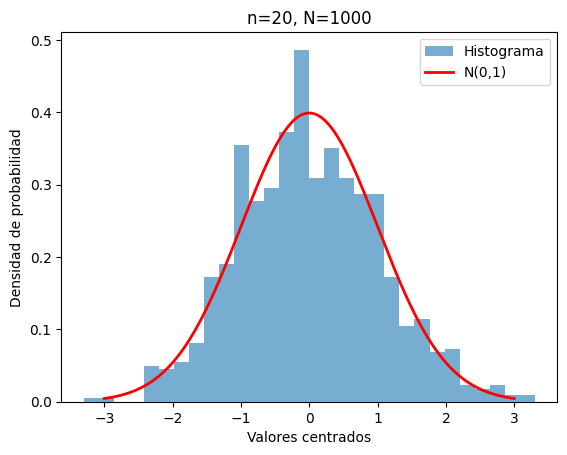

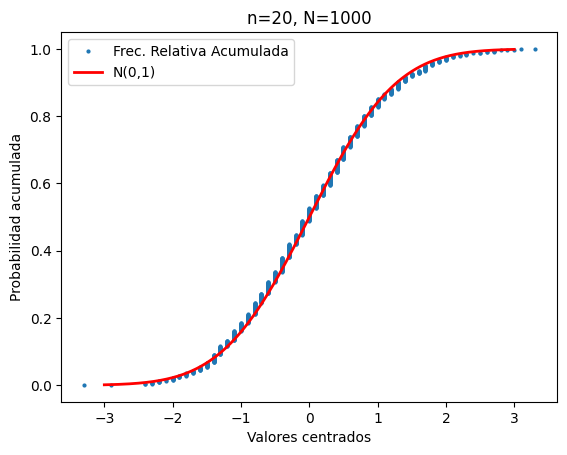

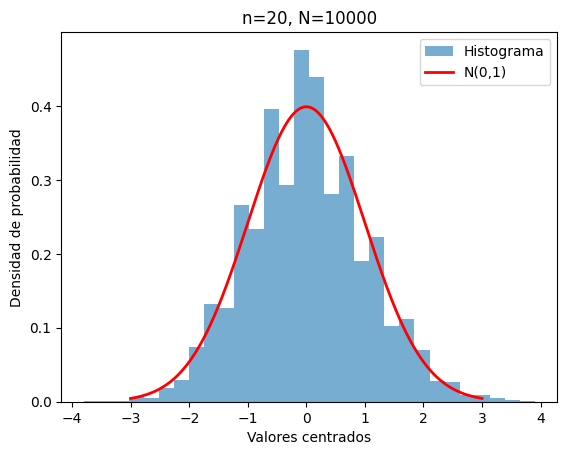

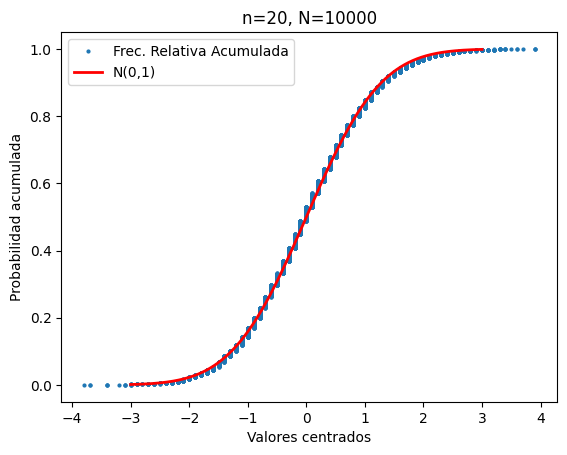

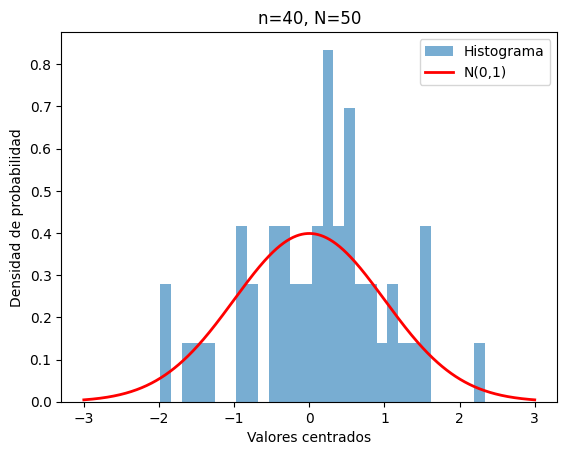

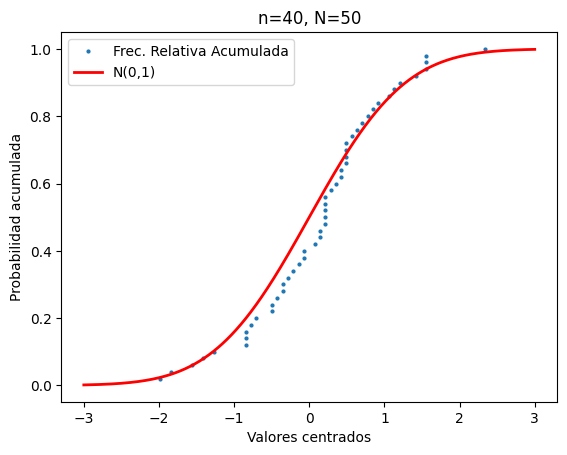

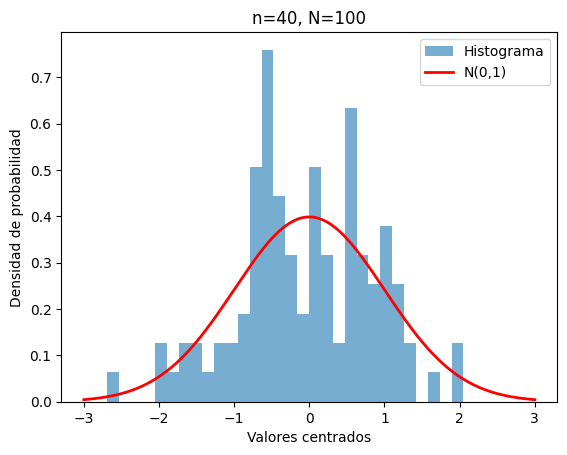

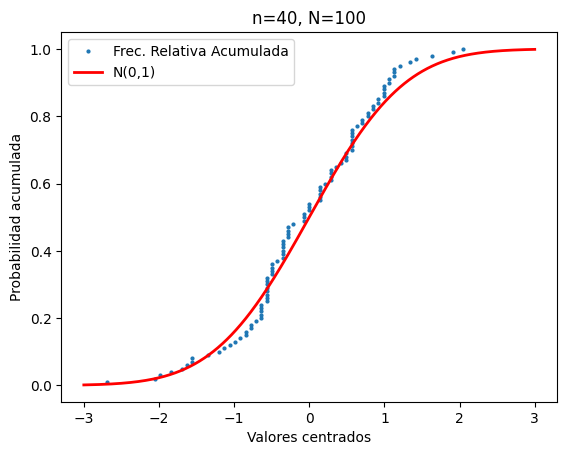

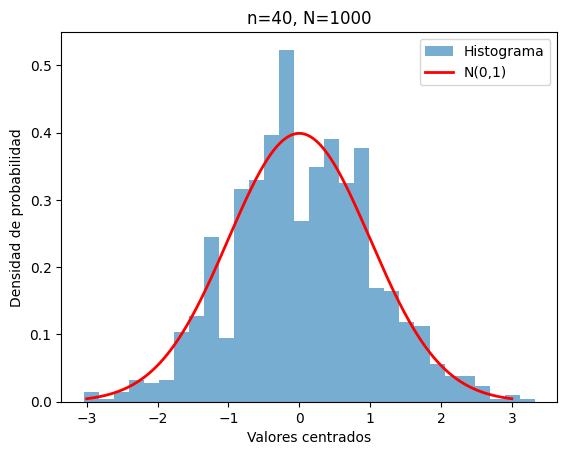

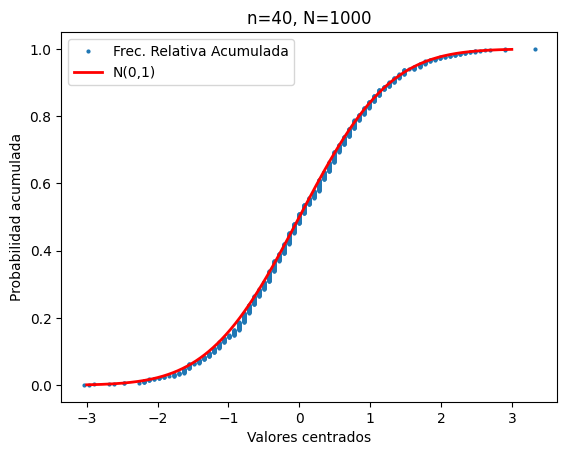

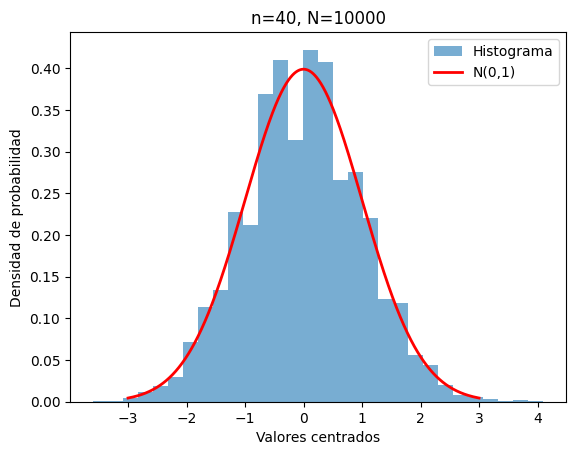

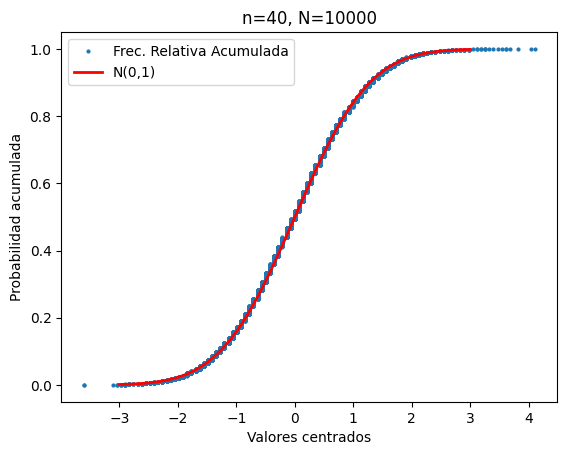

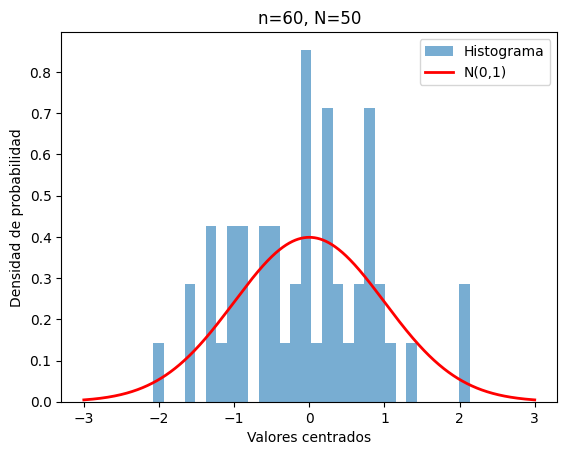

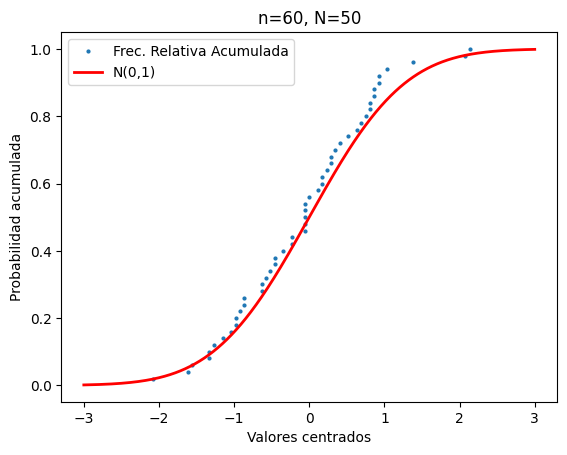

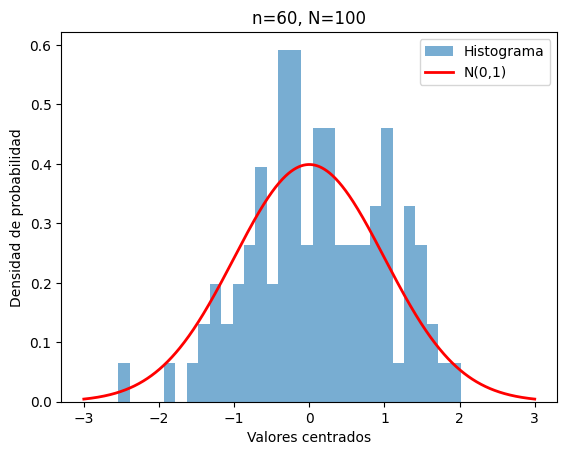

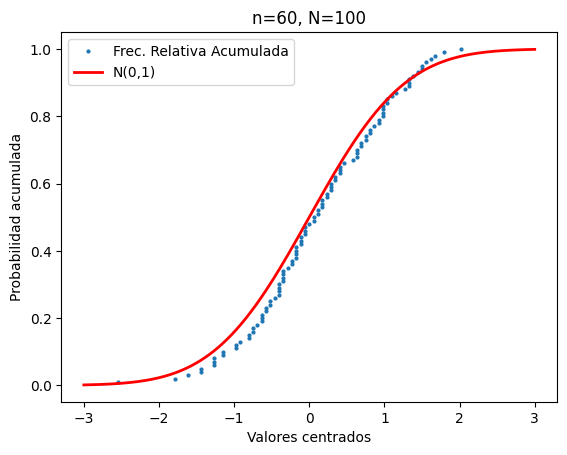

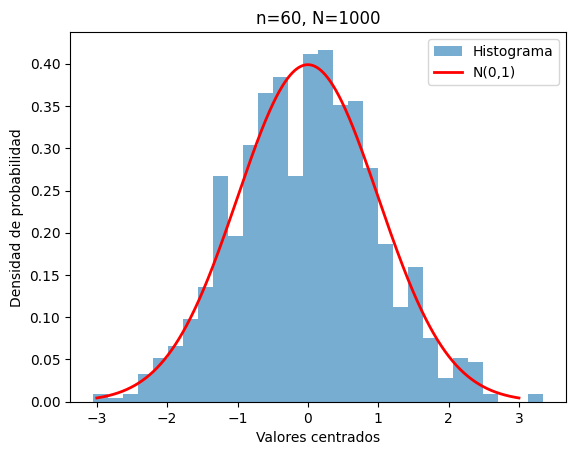

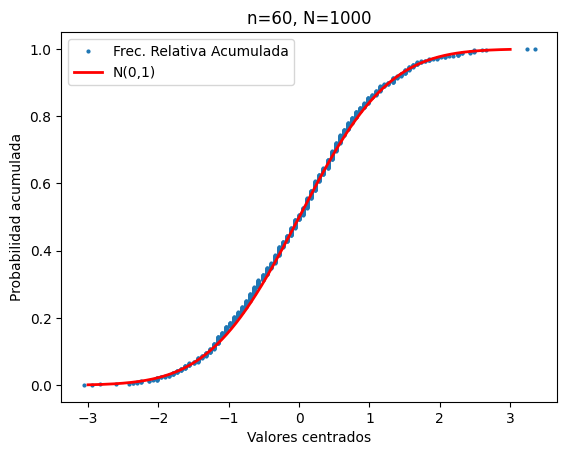

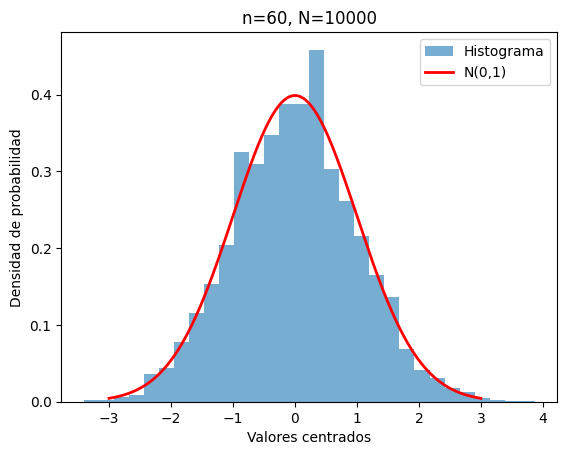

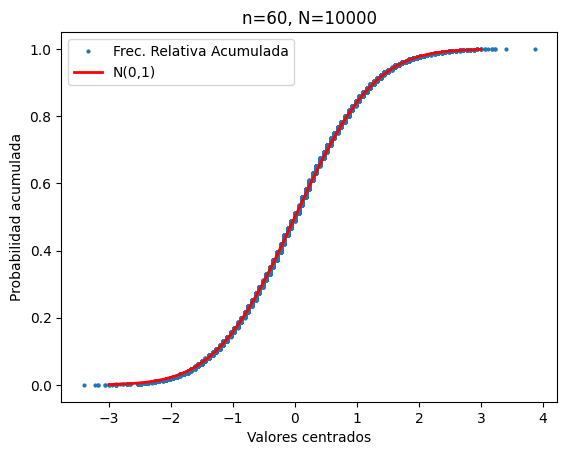

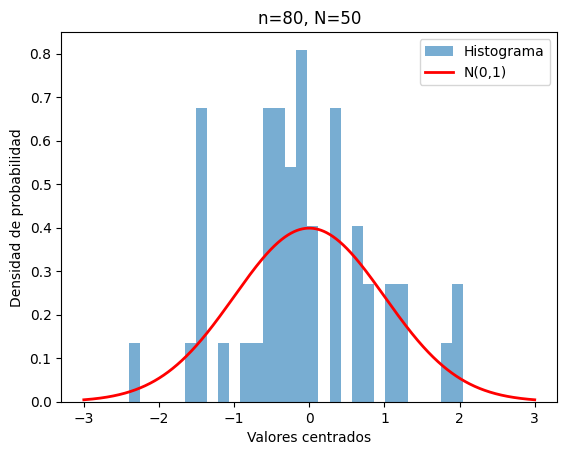

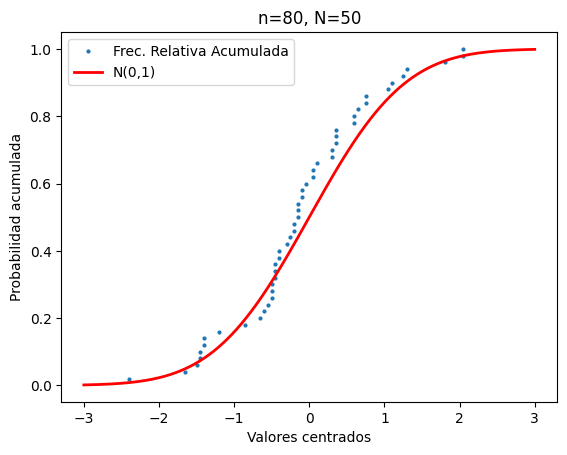

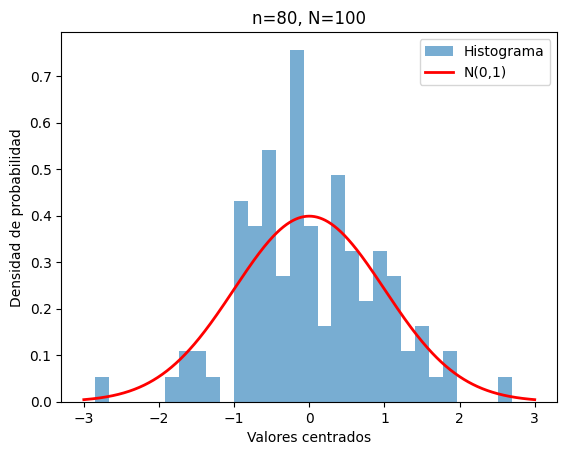

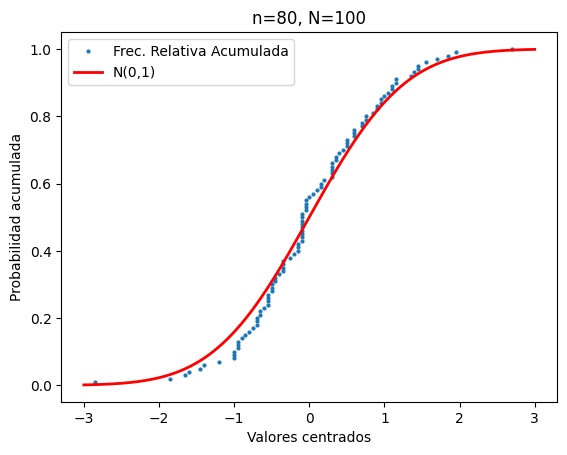

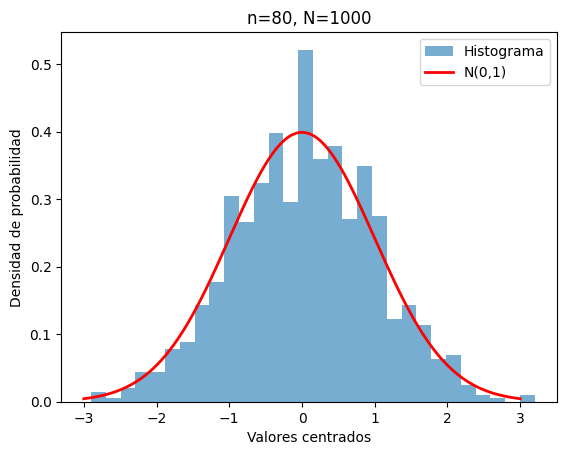

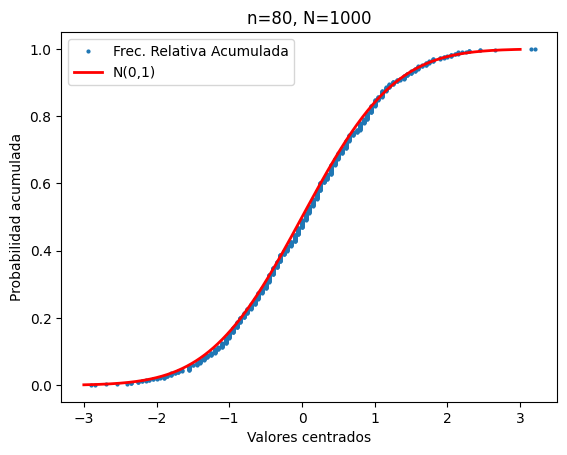

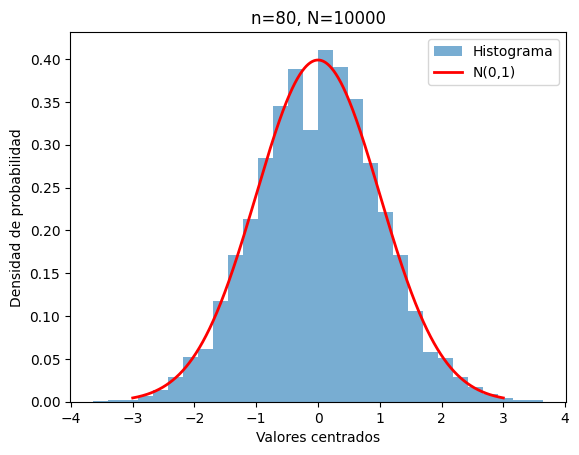

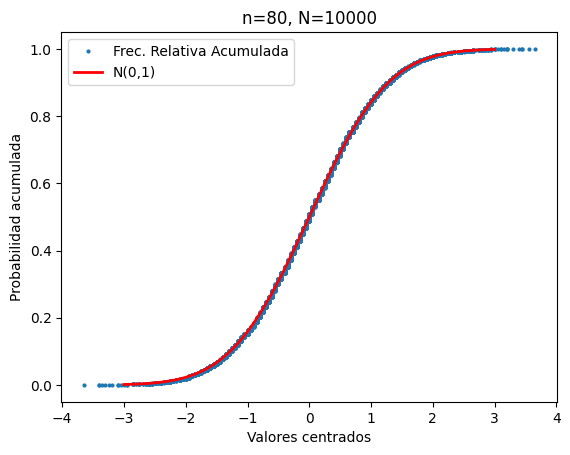

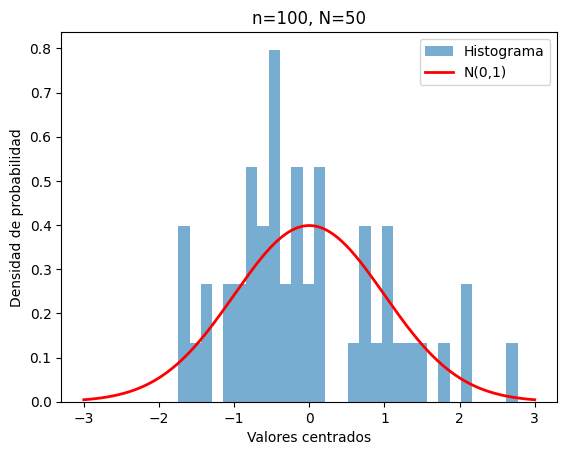

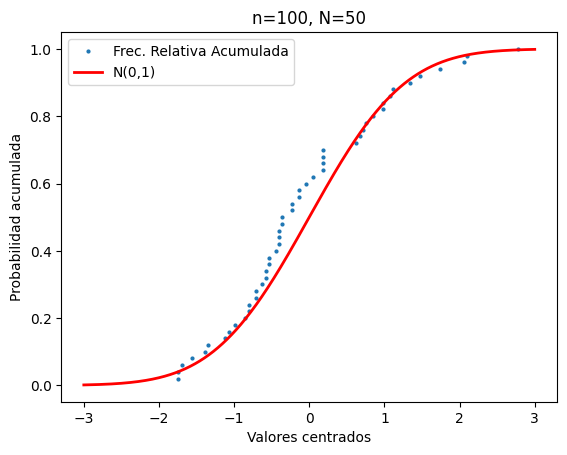

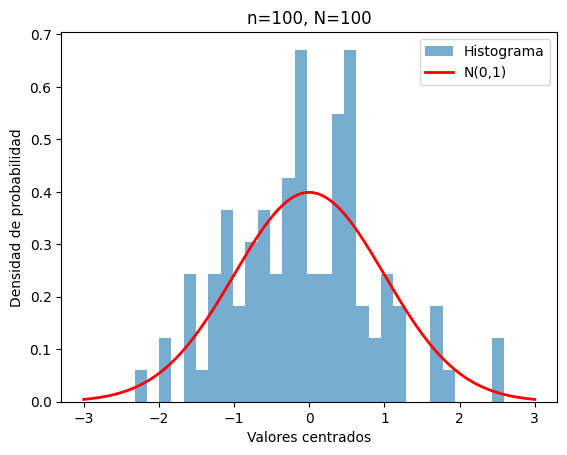

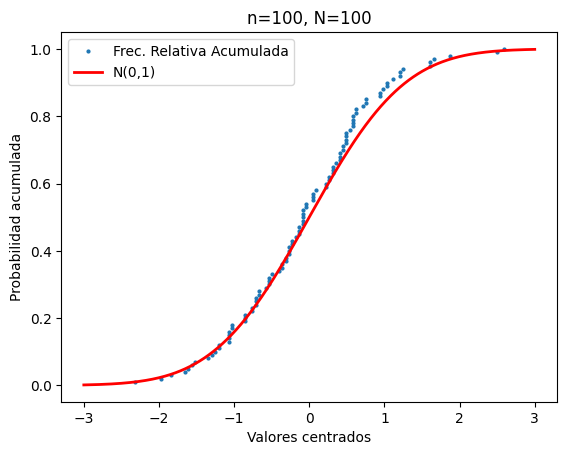

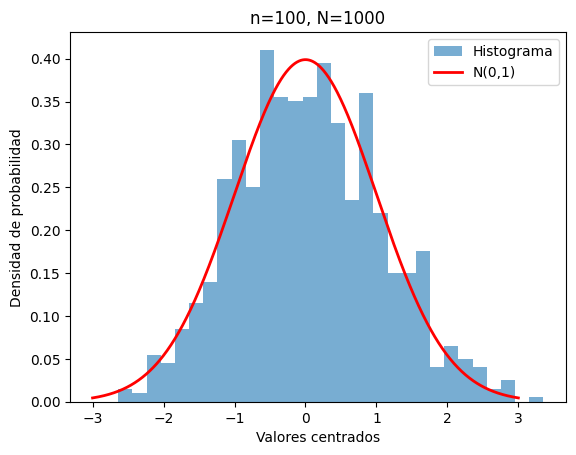

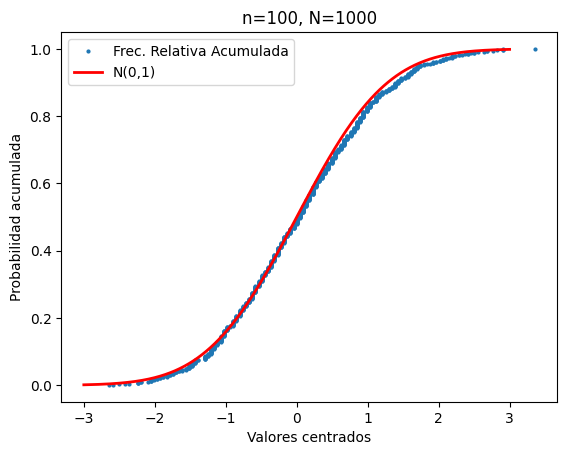

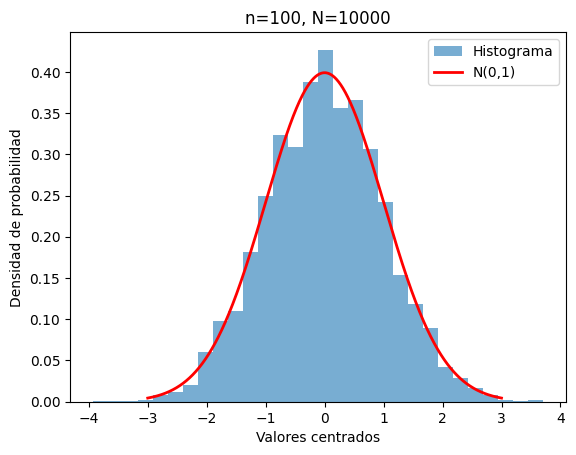

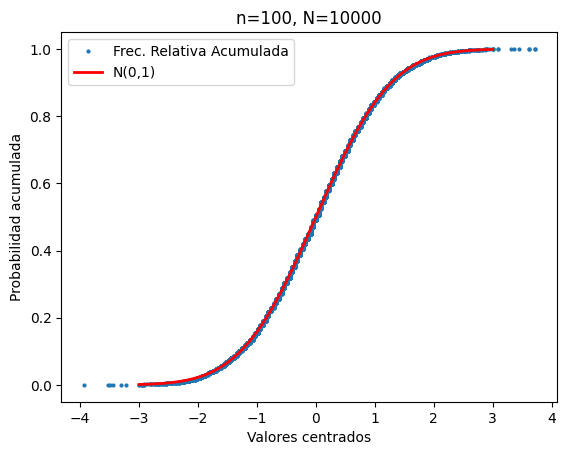

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import poisson

# Parámetros de la distribución de Poisson
lambda_poisson = 5  # Cambiar el valor de lambda según tu elección

# Valores de n y N
n_values = [20, 40, 60, 80, 100]
N_values = [50, 100, 1000, 10000]

for n in n_values:
    for N in N_values:
        # Paso 1: Generar n valores de una distribución de Poisson
        sample = np.random.poisson(lambda_poisson, size=(N, n))
        means = np.mean(sample, axis=1)

        # Paso 2: Calcular promedios centrados
        centered_means = (means - lambda_poisson) / (np.sqrt(lambda_poisson) / np.sqrt(n))

        # Paso 3: Histograma y función de densidad normal
        plt.figure()
        plt.hist(centered_means, bins=30, density=True, alpha=0.6, label='Histograma')
        x = np.linspace(-3, 3, 1000)
        plt.plot(x, norm.pdf(x, 0, 1), 'r', lw=2, label='N(0,1)')
        plt.title(f'n={n}, N={N}')
        plt.xlabel('Valores centrados')
        plt.ylabel('Densidad de probabilidad')
        plt.legend()

        # Paso 4: Gráfica de frecuencia relativa acumulada y función de distribución acumulada de N(0,1)
        plt.figure()
        sorted_means = np.sort(centered_means)
        y = np.arange(1, N + 1) / N
        plt.plot(sorted_means, y, marker='.', linestyle='none', markersize=4, label='Frec. Relativa Acumulada')
        plt.plot(x, norm.cdf(x, 0, 1), 'r', lw=2, label='N(0,1)')
        plt.title(f'n={n}, N={N}')
        plt.xlabel('Valores centrados')
        plt.ylabel('Probabilidad acumulada')
        plt.legend()

plt.show()


# Continua

C:\Users\josem\AppData\Local\Temp\ipykernel_14664\1051018238.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


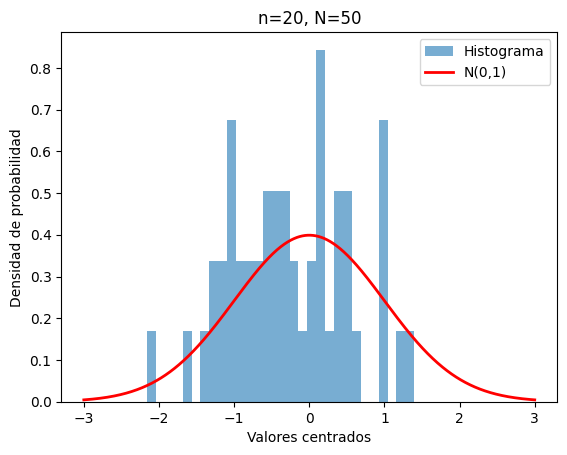

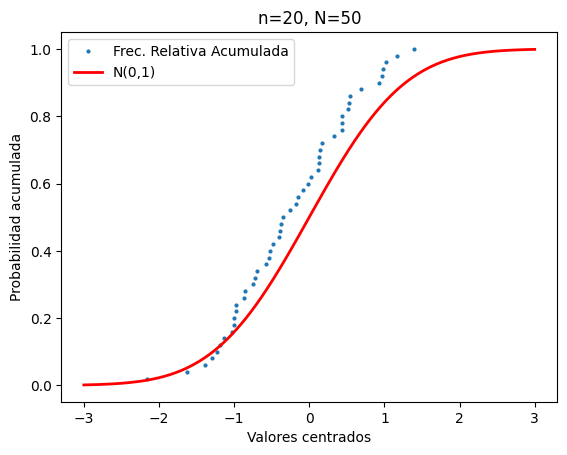

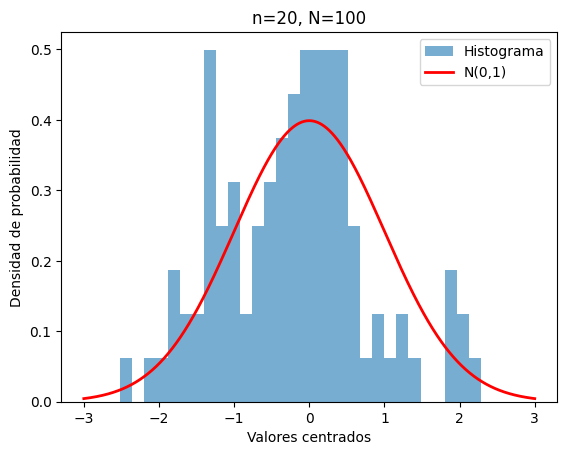

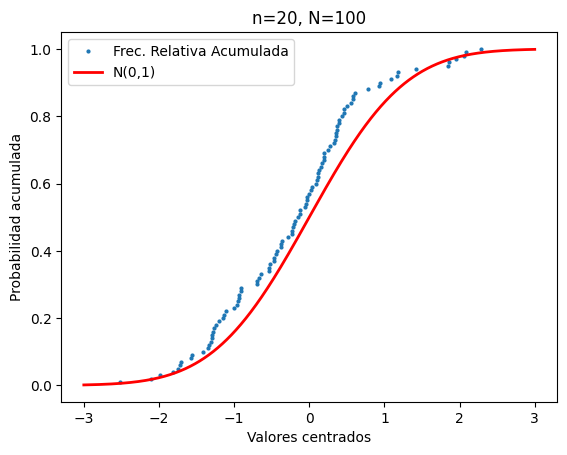

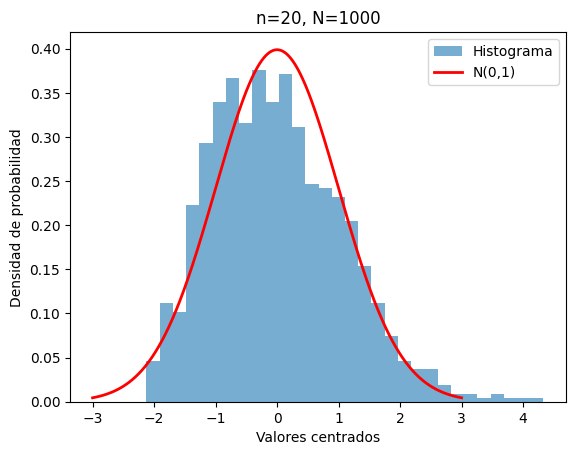

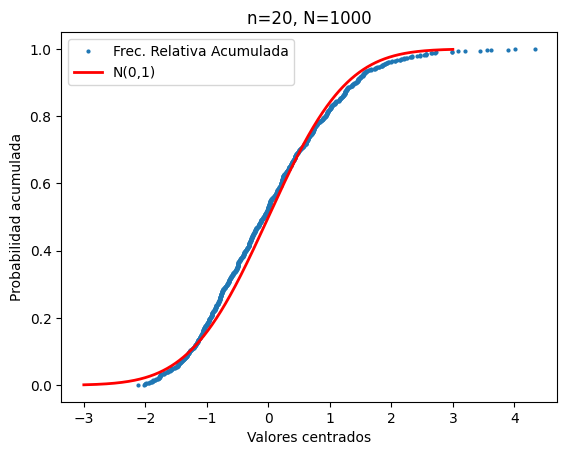

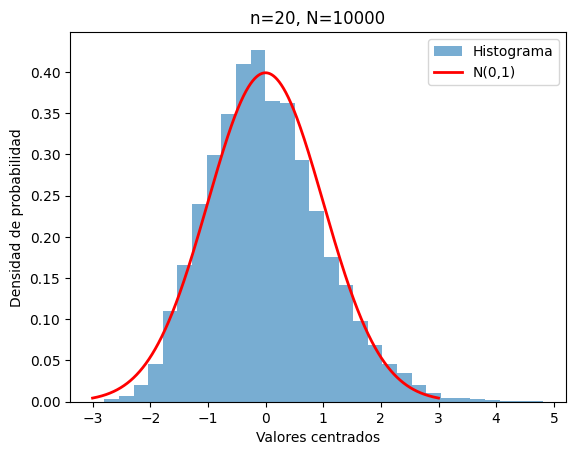

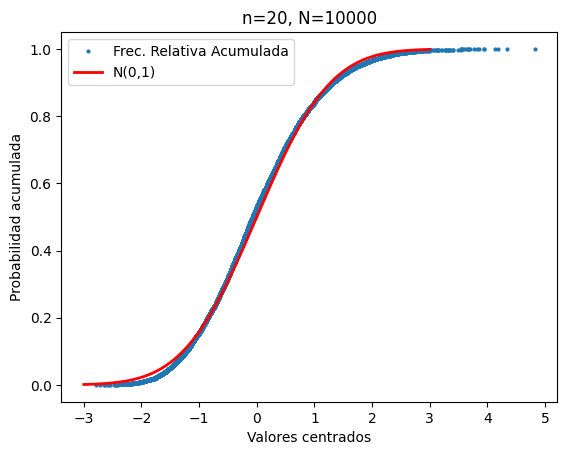

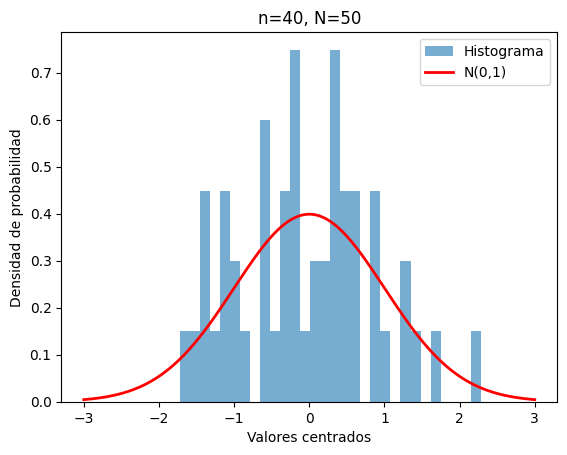

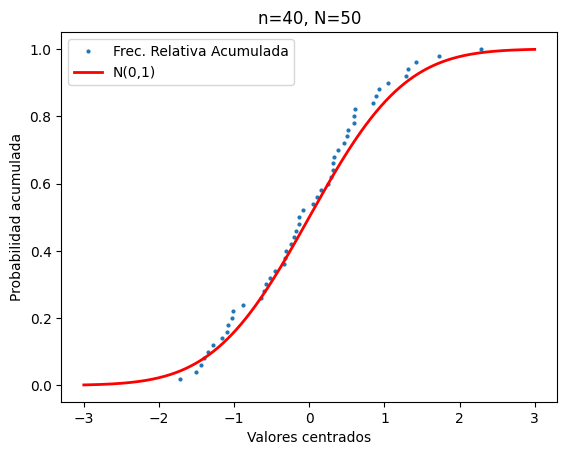

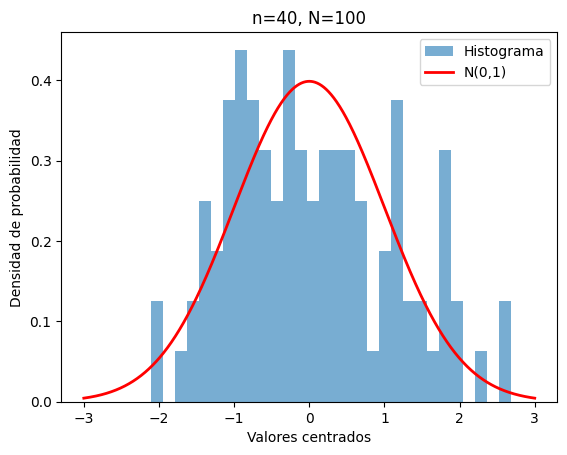

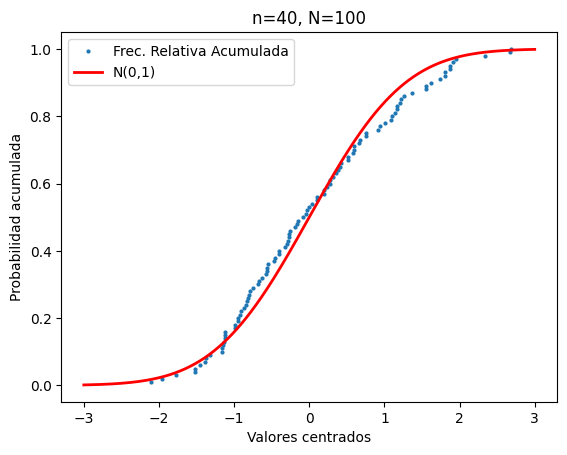

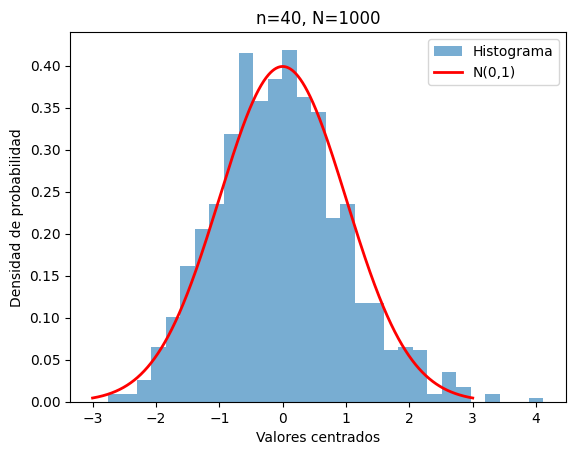

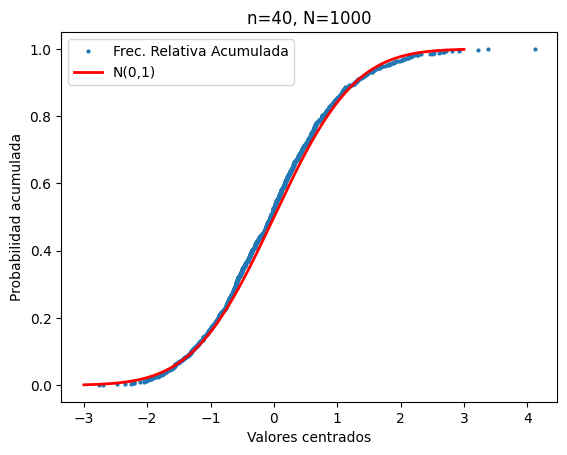

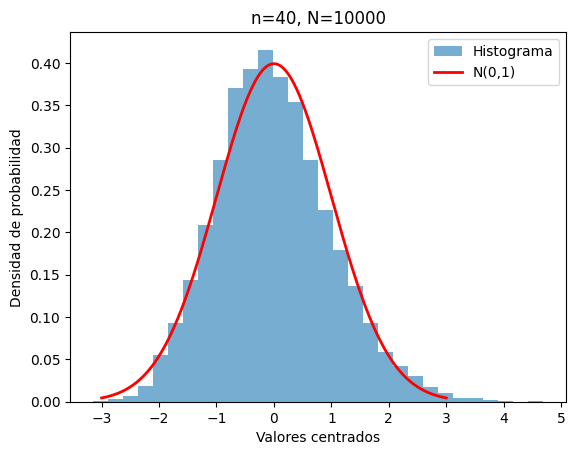

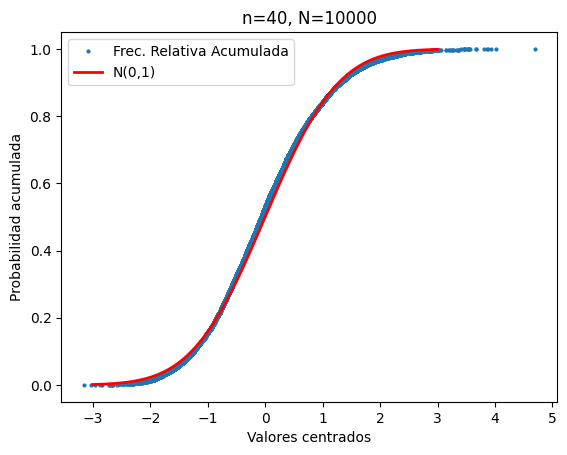

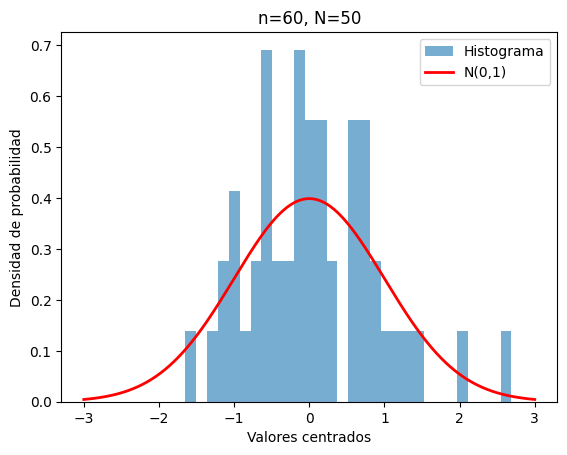

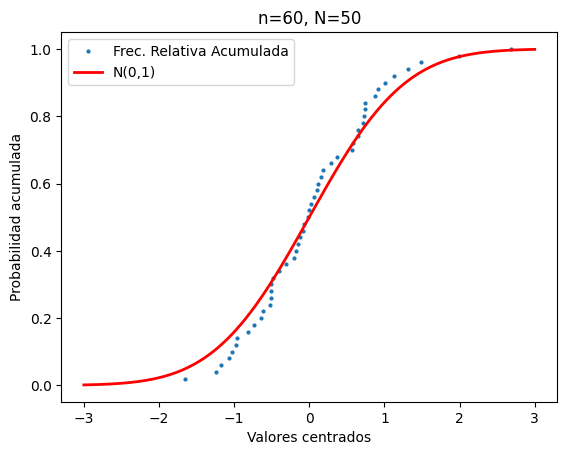

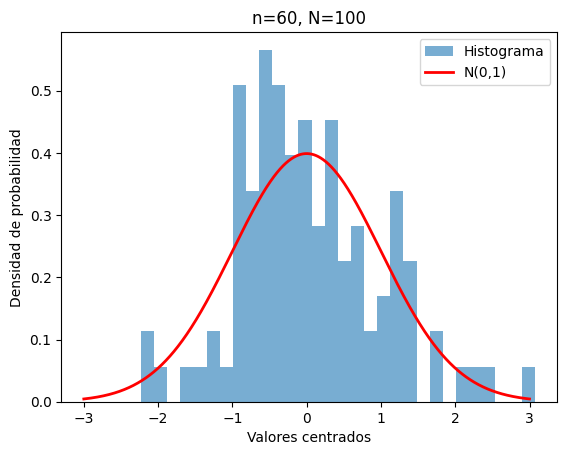

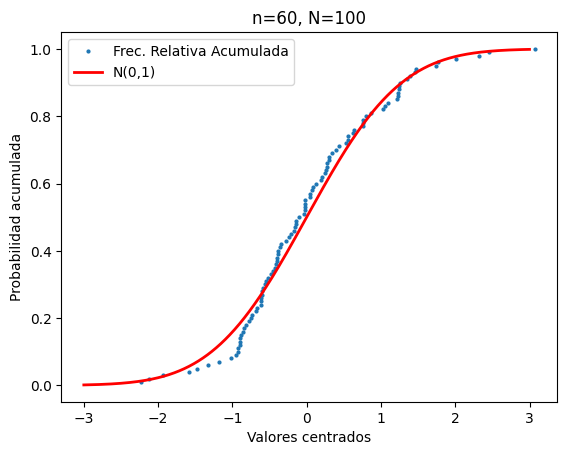

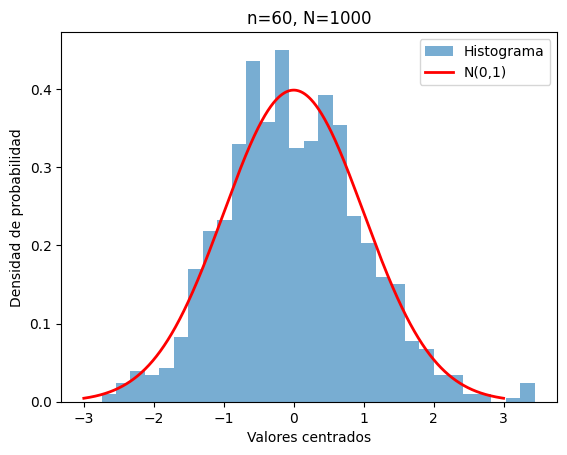

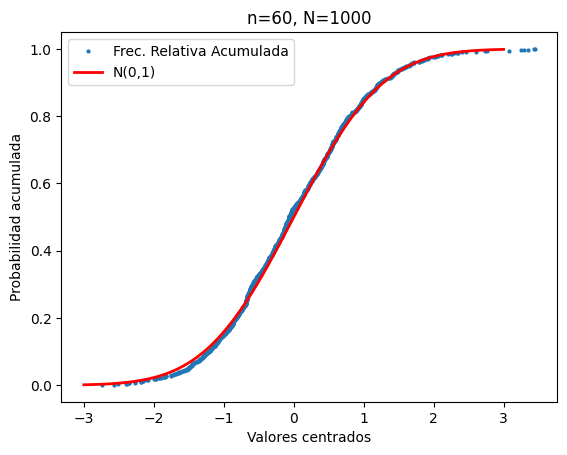

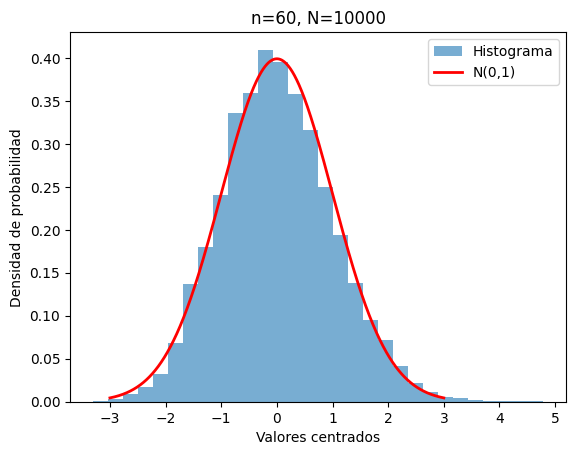

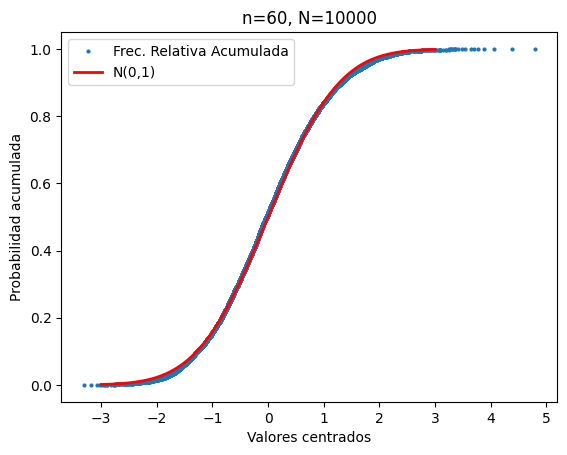

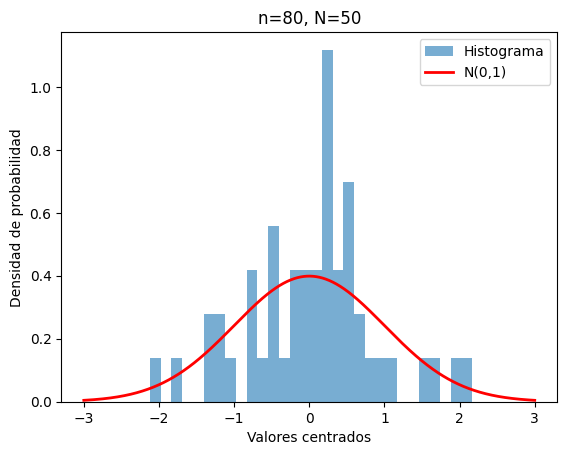

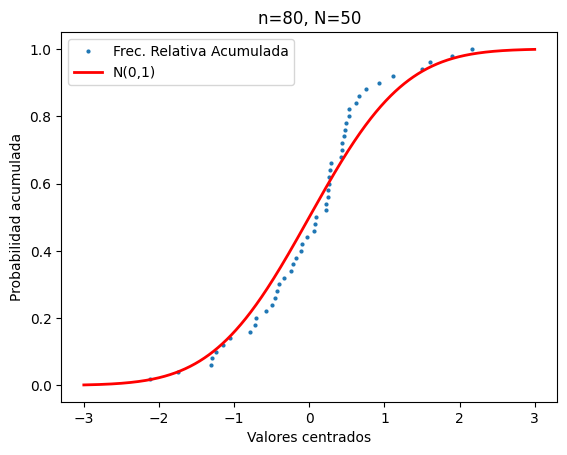

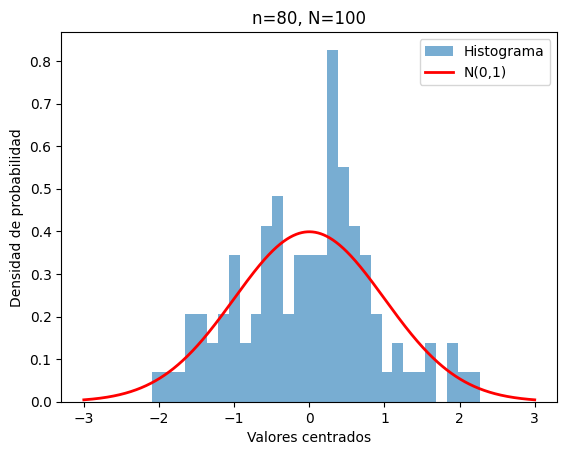

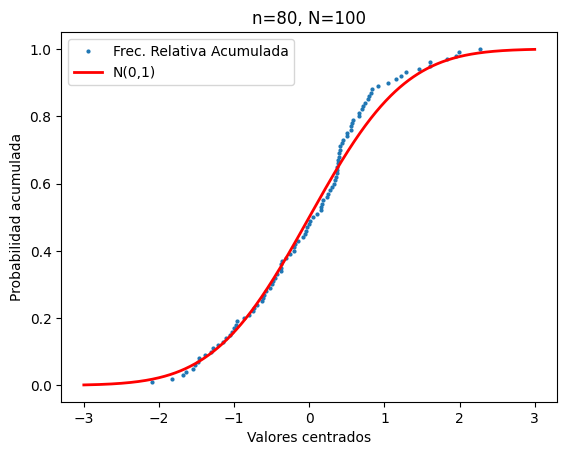

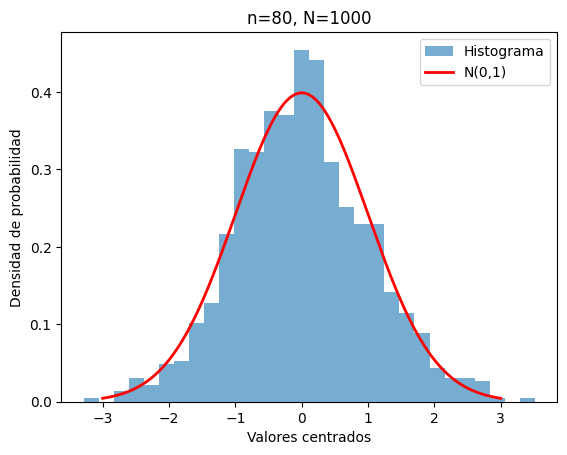

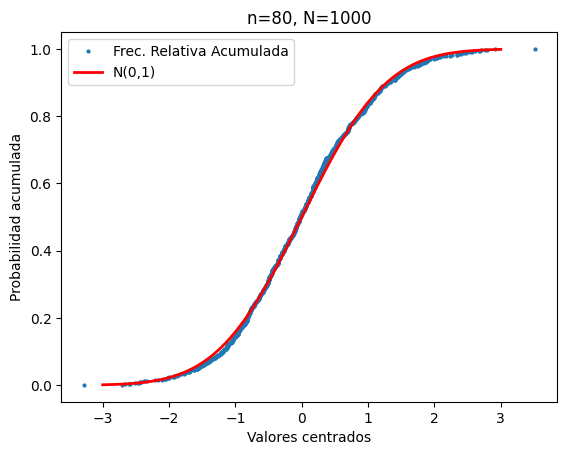

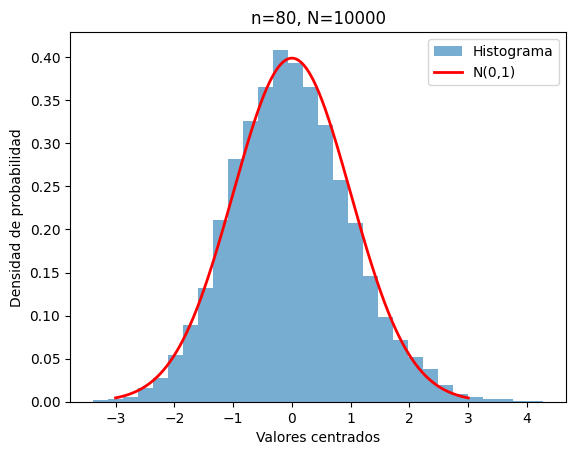

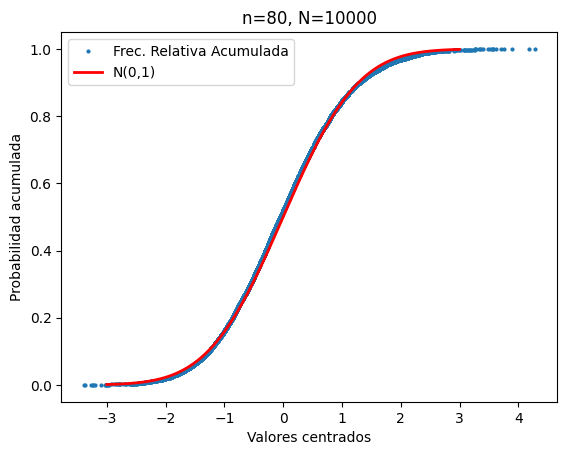

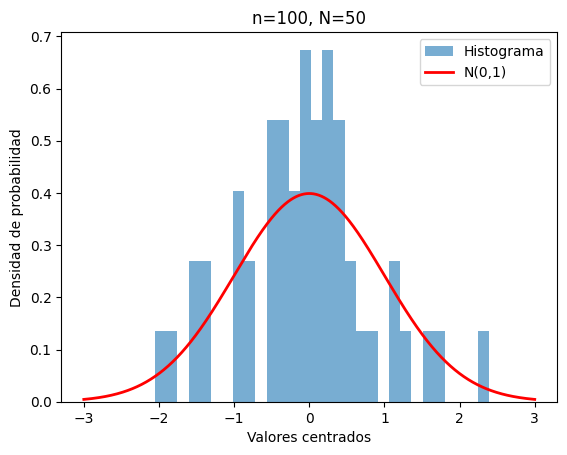

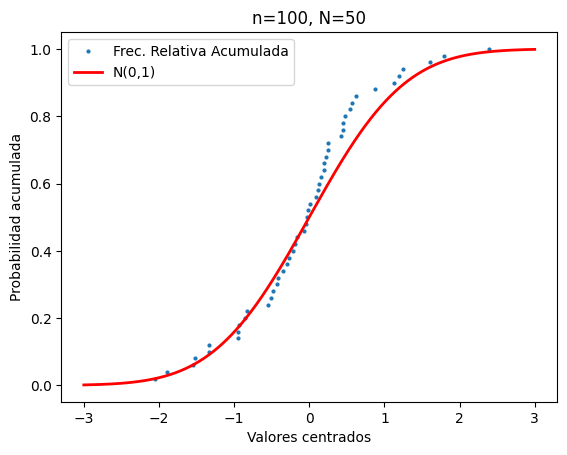

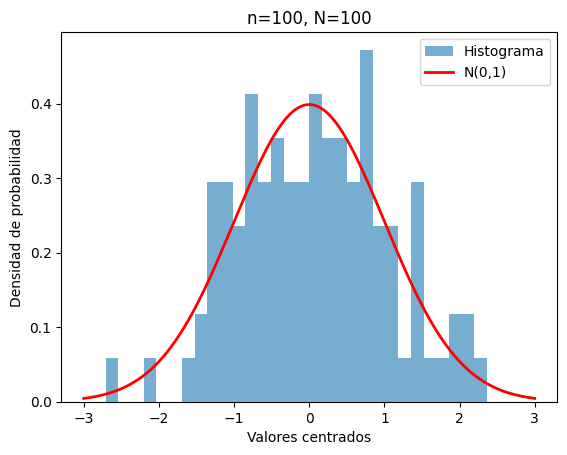

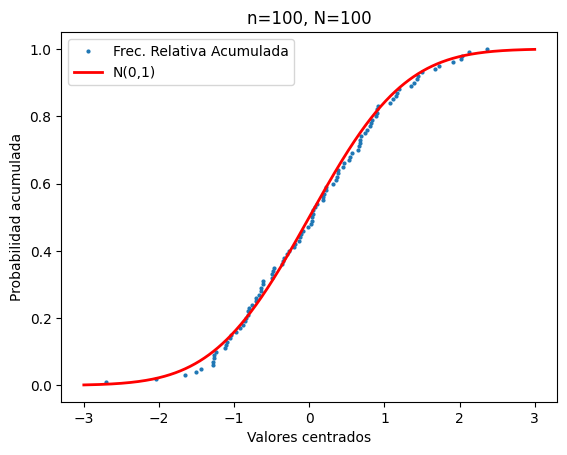

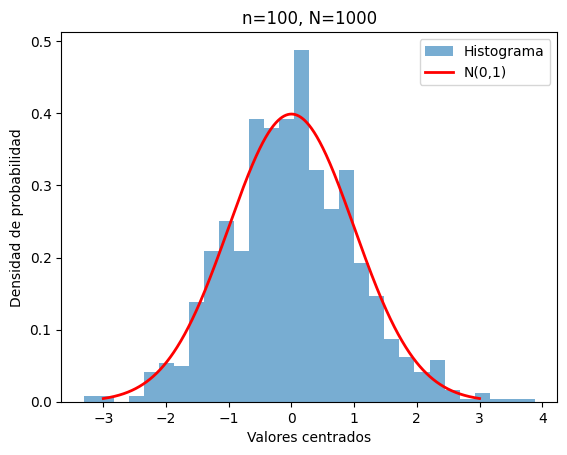

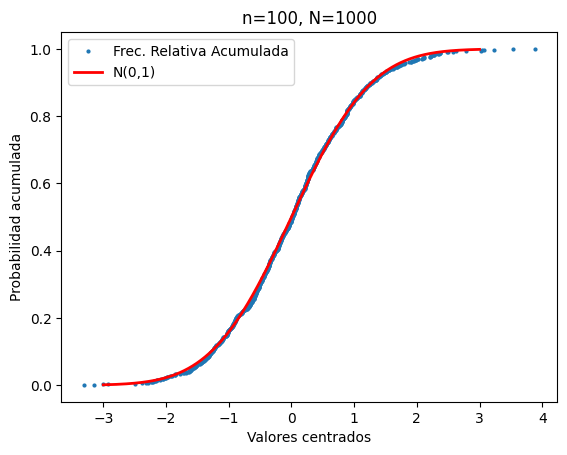

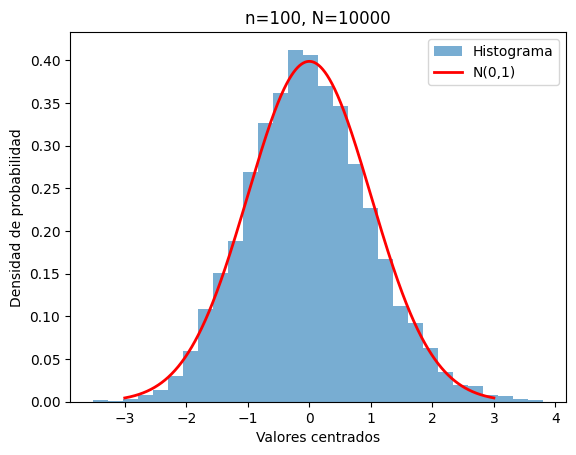

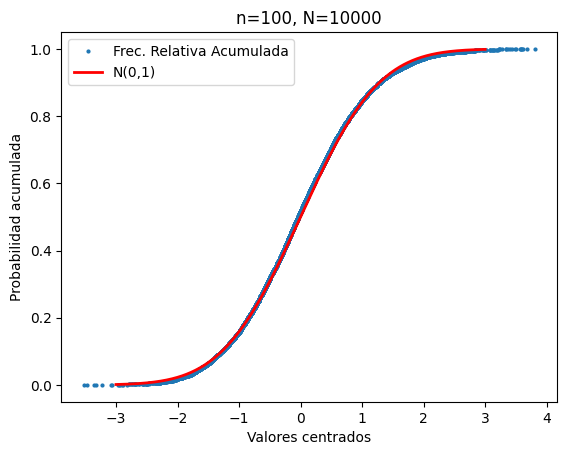

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon

# Parámetros de la distribución exponencial
lambda_expon = 2  # Cambiar el valor de lambda según tu elección

# Valores de n y N
n_values = [20, 40, 60, 80, 100]
N_values = [50, 100, 1000, 10000]

for n in n_values:
    for N in N_values:
        # Paso 1: Generar n valores de una distribución exponencial
        sample = np.random.exponential(scale=1/lambda_expon, size=(N, n))
        means = np.mean(sample, axis=1)

        # Paso 2: Calcular promedios centrados
        centered_means = (means - 1/lambda_expon) / (1/lambda_expon / np.sqrt(n))

        # Paso 3: Histograma y función de densidad normal
        plt.figure()
        plt.hist(centered_means, bins=30, density=True, alpha=0.6, label='Histograma')
        x = np.linspace(-3, 3, 1000)
        plt.plot(x, norm.pdf(x, 0, 1), 'r', lw=2, label='N(0,1)')
        plt.title(f'n={n}, N={N}')
        plt.xlabel('Valores centrados')
        plt.ylabel('Densidad de probabilidad')
        plt.legend()

        # Paso 4: Gráfica de frecuencia relativa acumulada y función de distribución acumulada de N(0,1)
        plt.figure()
        sorted_means = np.sort(centered_means)
        y = np.arange(1, N + 1) / N
        plt.plot(sorted_means, y, marker='.', linestyle='none', markersize=4, label='Frec. Relativa Acumulada')
        plt.plot(x, norm.cdf(x, 0, 1), 'r', lw=2, label='N(0,1)')
        plt.title(f'n={n}, N={N}')
        plt.xlabel('Valores centrados')
        plt.ylabel('Probabilidad acumulada')
        plt.legend()

plt.show()
